#### Introduction

Energy consumption refers to the total amount of energy used by individuals, house hold owners, organizations, and cities to power various activities and processes and enhance productivity in the business sectors. It encompasses the utilization of resources such as electricity, gas, oil, and renewable sources like solar and wind. Understanding energy consumption patterns is critical for resource allocation optimization, mitigating environmental impact, and ensuring the sustainability of energy systems.

Tracking and analyzing energy consumption data on daily, monthly or yearly bases helps to provide valuable insights into trends, peak usage periods, and areas of inefficiency. However, some factors influence energy consumption, they include temperature, humidity, population growth, economic development, technological advancements, shifts in energy policies and regulations.

#### Project Scope

This project is focused on Create models to forecast the energy consumption of buildings, areas, or utilities for a better decision making of energy usage.
This work is implemented using Python, jupyter notebook IDE, machine learning algorithm (such as linear regression, ridge, lasso and decision tree) and application of hyperparameter tunning to get the model that best fit in the data set.  In most cases, designing and implementing a project work is limited by time frame, network, power supply and finance. 



##### Use Case 
Our data set for this project was collected from kaggle: https://www.kaggle.com/code/mrsimple07/energy-consumption-eda-prediction/input

#### Objective

Our objective is to determine the energy consumption rate based on an environment.
We fit 4 regression models and find the best model to describe our data. The models are:

* Linear Regression
* Ridge Regression
* Lasso 
* Decision Tree

* Dataset description


Our dataset has 1000 rows and 11 columns. Each entry contains the following information

• **Time Stamp**: Records the date and time of the observation..

• **Temperature**: Measures the ambient temperature in the environment.

• **Humidity**: Indicates the level of moisture or humidity in the air.

• **Square Footage**:Represents the total area of the property or building in square feet..

• **Occupancy**:Indicates whether the property or building is occupied or vacant.. 

• **HVAC Usage**: Tracks the usage of the heating, ventilation, and air conditioning system.

• **Lighting Usage**: Records the usage of artificial lighting within the property or building..

• **Renewable Energy**: Indicates the usage or generation of energy from renewable sources such as solar or wind power.

• **Day of Week**: Specifies the day of the week corresponding to the observation.

• **Holiday**:  Indicates whether the observation falls on a holiday or special occasion.

• **Energy Consumption**: Tracks the overall energy consumption of the property or building.



In [191]:
#importing the necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import datetime as dt

#importing warnings to help in ignoring warning issues/ messages
import warnings
warnings.filterwarnings('ignore')
import missingno as msno


In [19]:
#importing statistical libraries
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import norm

#import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,  ExtraTreesRegressor, RandomForestRegressor, StackingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import lightgbm
from lightgbm import LGBMRegressor

import pickle

In [20]:
df =pd.read_csv('Energy_consumption.csv')

In [21]:
df.shape

(1000, 11)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


### Data Exploration


In [23]:
#decsribing all the statistical information about the data
df.describe()

Temperature     Humidity  SquareFootage    Occupancy  RenewableEnergy  \
count  1000.000000  1000.000000    1000.000000  1000.000000      1000.000000   
mean     24.982026    45.395412    1500.052488     4.581000        15.132813   
std       2.836850     8.518905     288.418873     2.865598         8.745917   
min      20.007565    30.015975    1000.512661     0.000000         0.006642   
25%      22.645070    38.297722    1247.108548     2.000000         7.628385   
50%      24.751637    45.972116    1507.967426     5.000000        15.072296   
75%      27.418174    52.420066    1740.340165     7.000000        22.884064   
max      29.998671    59.969085    1999.982252     9.000000        29.965327   

       EnergyConsumption  
count        1000.000000  
mean           77.055873  
std             8.144112  
min            53.263278  
25%            71.544690  
50%            76.943696  
75%            82.921742  
max            99.201120

**Comment**: *The minimum and maximum value of energy consumption in the dataset are 53, and 99 (Kilo Watz) respectively, while the average is 77.*
*While the minimum and average occupant is 0 and the average is 5, maximum is 9.* 
*The minimum temperature is 20 and the maximum is 29. while in humidity, the minimum is 30 and the maximum is 60.*

*Although there are some outliers within the data*

*count if for the values of the variables*

###### Data Cleaning

In [32]:
#checking the counts of the duplicate values  within the data
columns = df.columns
columns
#df.duplicated().value_counts()

Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')

In [34]:
dupl = df.pivot_table(index= ['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],aggfunc ='size')

dupl

Timestamp            Temperature  Humidity   SquareFootage  Occupancy  HVACUsage  LightingUsage  RenewableEnergy  DayOfWeek  Holiday  EnergyConsumption
2022-01-01 00:00:00  25.139433    43.431581  1565.693999    5          On         Off            2.774699         Monday     No       75.364373            1
2022-01-01 01:00:00  27.731651    54.225919  1411.064918    1          On         On             21.831384        Saturday   No       83.401855            1
2022-01-01 02:00:00  28.704277    58.907658  1755.715009    2          Off        Off            6.764672         Sunday     No       78.270888            1
2022-01-01 03:00:00  20.080469    50.371637  1452.316318    1          Off        On             8.623447         Wednesday  No       56.519850            1
2022-01-01 04:00:00  23.097359    51.401421  1094.130359    9          On         Off            3.071969         Friday     No       70.811732            1
                                                               

In [36]:
#getting the duplicate counts within each row
dupl = len(df)-len(df.drop_duplicates())
dupl

0

In [37]:
dupl_count = df[df.duplicated()].shape
dupl_count

(0, 11)

*Having searched in both rows and columns of the data set, it was found that there is no duplicate values in the data set*

**Observation:** We have no duplicate data

In [29]:
#checking for null values
null_val = df.isnull().sum()
null_val

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

*It shows that there is no null value in the data set*

In [39]:
# rename some columns
df.rename(columns = {'Timestamp':'Date_Time', 'SquareFootage':'Square_Footage', 'HVACUsage':'HVAC_Usage', 'LightingUsage':'Lighting_Usage', 
                     'RenewableEnergy':'Renewable_Energy', 'DayOfWeek':'Day_Of_Week', 'EnergyConsumption':'Energy_Consumption'
                     }, inplace = True)

#### checking for uniqueness of the columns

In [40]:
df['HVAC_Usage'].unique()

array(['On', 'Off'], dtype=object)

In [41]:
df['Lighting_Usage'].unique()

array(['Off', 'On'], dtype=object)

In [42]:
df['Day_Of_Week'].unique()

array(['Monday', 'Saturday', 'Sunday', 'Wednesday', 'Friday', 'Thursday',
       'Tuesday'], dtype=object)

In [43]:
df['Holiday'].unique()

array(['No', 'Yes'], dtype=object)

In [46]:
#working with the date from start to end as well as changing the date datatype
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Date_Time']

0     2022-01-01 00:00:00
1     2022-01-01 01:00:00
2     2022-01-01 02:00:00
3     2022-01-01 03:00:00
4     2022-01-01 04:00:00
              ...        
995   2022-02-11 11:00:00
996   2022-02-11 12:00:00
997   2022-02-11 13:00:00
998   2022-02-11 14:00:00
999   2022-02-11 15:00:00
Name: Date_Time, Length: 1000, dtype: datetime64[ns]

In [56]:
# Extract the day, month, year from the Date column and converting the datatype of the timestamp to datetime
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['year']  = df['Date_Time'].dt.year
df['month'] = df['Date_Time'].dt.weekday
df['day'] = df['Date_Time'].dt.month
df['hour'] = df['Date_Time'].dt.hour

***Comment:***  *Here we segregated the date column into four (4) different parts; the year, the month, day and the hour which helps in analysing the date based on month, day and hour.*

In [57]:
#finding the duration of time of which the analysis is to be carried out
df['Date_Time'].max() - df['Date_Time'].min()


Timedelta('41 days 15:00:00')

In [58]:
df.iloc[-24:].describe().astype(str)

Date_Time         Temperature            Humidity  \
count                   24                24.0                24.0   
mean   2022-02-11 03:30:00  24.495373029320604   46.44611370314061   
min    2022-02-10 16:00:00   20.59433697464107  31.306459213751577   
25%    2022-02-10 21:45:00   22.17526460227195  41.999291844378085   
50%    2022-02-11 03:30:00  23.718871139689192   48.78533036089054   
75%    2022-02-11 09:15:00   26.98498340869686  51.294371123944785   
max    2022-02-11 15:00:00  29.169420553736146   59.67847838025118   
std                    nan  2.8236716992414164   7.947384278571665   

           Square_Footage          Occupancy    Renewable_Energy  \
count                24.0               24.0                24.0   
mean    1400.451178873894  4.958333333333333   16.03515118465042   
min     1017.976144448651                0.0  0.2970785734303527   
25%    1165.1510377667378               3.75   8.396958454178066   
50%    1355.9622871517295                5.0  15.723782616262646   
75%    1581.0625023250777                6.0    24.6182694301607   
max    1950.1290995287943                9.0   28.68973155930708   
std       276.46285058407   2.21612993392941   9.228878193628029   

      Energy_Consumption    year                month   day  \
count               24.0    24.0                 24.0  24.0   
mean   76.13262904184079  2022.0   3.6666666666666665   2.0   
min    62.72987331802409  2022.0                  3.0   2.0   
25%    70.73559541876817  2022.0                  3.0   2.0   
50%    74.32362522762779  2022.0                  4.0   2.0   
75%    82.55488465969631  2022.0                  4.0   2.0   
max    93.63964381269945  2022.0                  4.0   2.0   
std    8.374691416195391     0.0  0.48154341234307696   0.0   

                     hour  
count                24.0  
mean                 11.5  
min                   0.0  
25%                  5.75  
50%                  11.5  
75%                 17.25  
max                  23.0  
std    7.0710678118654755

***Observation:*** from the table above, 
In the last 24 days, *The minimum and maximum value of energy consumption in the dataset are 53, and 99 (Kilo Watz) respectively, while the average is 77.*
*While the minimum and average occupant is 0 and the average is 5, maximum is 9.* 

*The maximum hour spent is 23 while the minimum hour was 0 and the average hour spent in conusuming energy is 12. Which means there was never a time that energy was not being consumed* 
*The minimum temperature is 20 and the maximum is 29. while in humidity, the minimum is 30 and the maximum is 60.*

### Data visualization

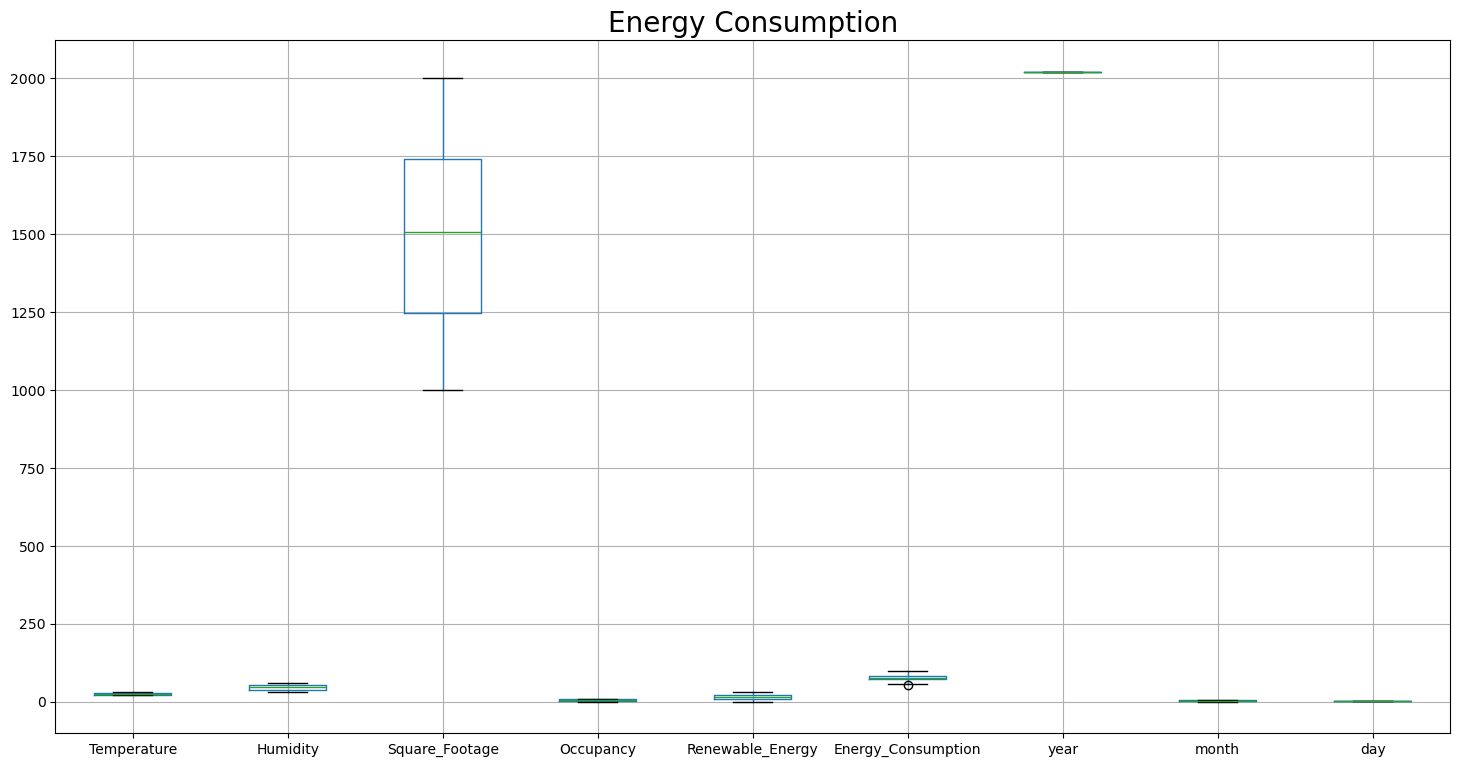

In [54]:
#checking for outliers using boxplot
plt.figure(figsize=(18,9))
df.boxplot()
plt.title("Energy Consumption", fontsize=20)
plt.show()

***Observation:***
Square footage seems to have an outlier

In [60]:
#Finding the Position of the  outlier
print(np.where(df['Square_Footage']>2.746965e+02))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

#### Observation

Outliers as an observation that deviate significantly from the rest of the data and may require special treatment or investigation, was identified in the square footage column. 
The threshold 2.746965e+02, which denotes a value of 274.6965 in a standard notation was used to identifying outliers in the Square Footage column. If the values are greater than 274.6965, indicating potential outliers or else it is not an outlier.


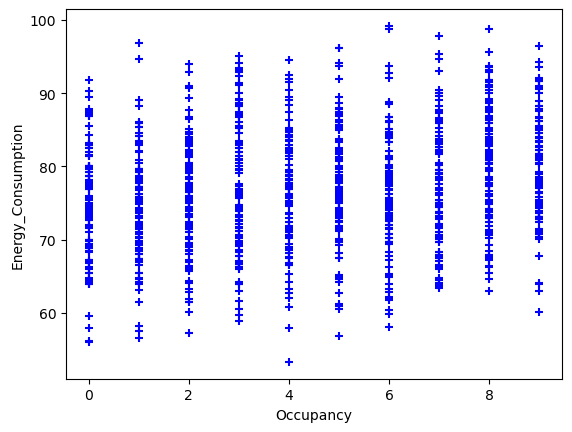

In [63]:
#Visualizing the rate of energy of a house in relation to the occupancy 

%matplotlib inline
plt.xlabel('Occupancy')
plt.ylabel('Energy_Consumption')
plt.scatter(df.Occupancy,df.Energy_Consumption,color='blue',marker='+')

***Observation:***
from the graph above, it can be seen that though the higher the number of occupant, the higher the energy consumption but not in all cases.The occupants with measures on how best to manage energy can still have minimal eneergy consumption.


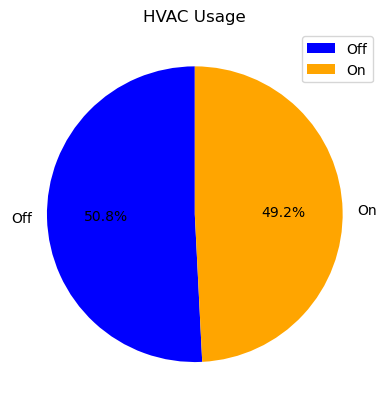

In [65]:
#checking the total rate of HVAC usage	

plt.pie(df['HVAC_Usage']. value_counts(),
       labels=df['HVAC_Usage'].value_counts(). index,autopct='%1.1f%%',
       colors=['blue', 'orange'], startangle =90
       )
plt.title('HVAC Usage')
plt.legend();

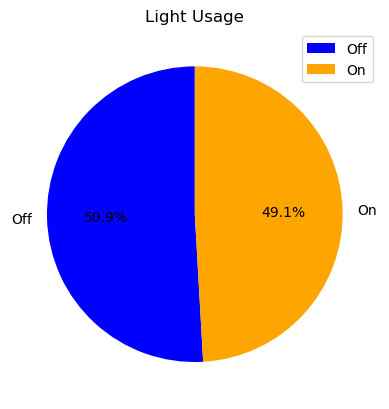

In [66]:
#checking the total rate of light usage	

plt.pie(df['Lighting_Usage']. value_counts(),
       labels=df['Lighting_Usage'].value_counts(). index,autopct='%1.1f%%',
       colors=['blue', 'orange'], startangle =90
       )
plt.title('Light Usage')
plt.legend();

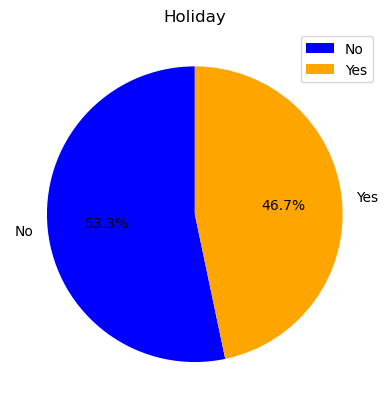

In [67]:
#checking the holiday	

plt.pie(df['Holiday']. value_counts(),
       labels=df['Holiday'].value_counts(). index,autopct='%1.1f%%',
       colors=['blue', 'orange'], startangle =90
       )
plt.title('Holiday')
plt.legend();

***Comments:***

*The rate at which occupants switch off their HVAC is 50.8% while when it is in use is 49.2% which is litle or no significant difference.*

*Because energy is consumed when electrical appliances are on, that is why there seems not be much different between the rate at which light is used and when the appliance is on.*

*The % of time at which occupants are on holiday46.7% while when not on holiday is 53.3%*


In [279]:
df.head(2)

Temperature   Humidity  Square_Footage  Occupancy  HVAC_Usage  \
0    25.139433  43.431581     1565.693999          5           1   
1    27.731651  54.225919     1411.064918          1           1   

   Lighting_Usage  Renewable_Energy  Day_Of_Week  Holiday  Energy_Consumption  \
0               0          2.774699            1        0           75.364373   
1               1         21.831384            2        0           83.401855   

   month  day  hour  
0      5    0     0  
1      5    0     1

In [284]:
#Selecting some columns to display 
temp = df[['HVAC_Usage', 'Temperature', 'Humidity', 'Lighting_Usage']]
temp.head(10)

HVAC_Usage  Temperature   Humidity  Lighting_Usage
0           1    25.139433  43.431581               0
1           1    27.731651  54.225919               1
2           0    28.704277  58.907658               0
3           0    20.080469  50.371637               1
4           1    23.097359  51.401421               0
5           0    29.576037  36.824263               0
6           1    25.131167  35.709622               0
7           0    23.182844  31.679920               0
8           1    25.391999  46.399364               0
9           1    22.212549  32.418464               0

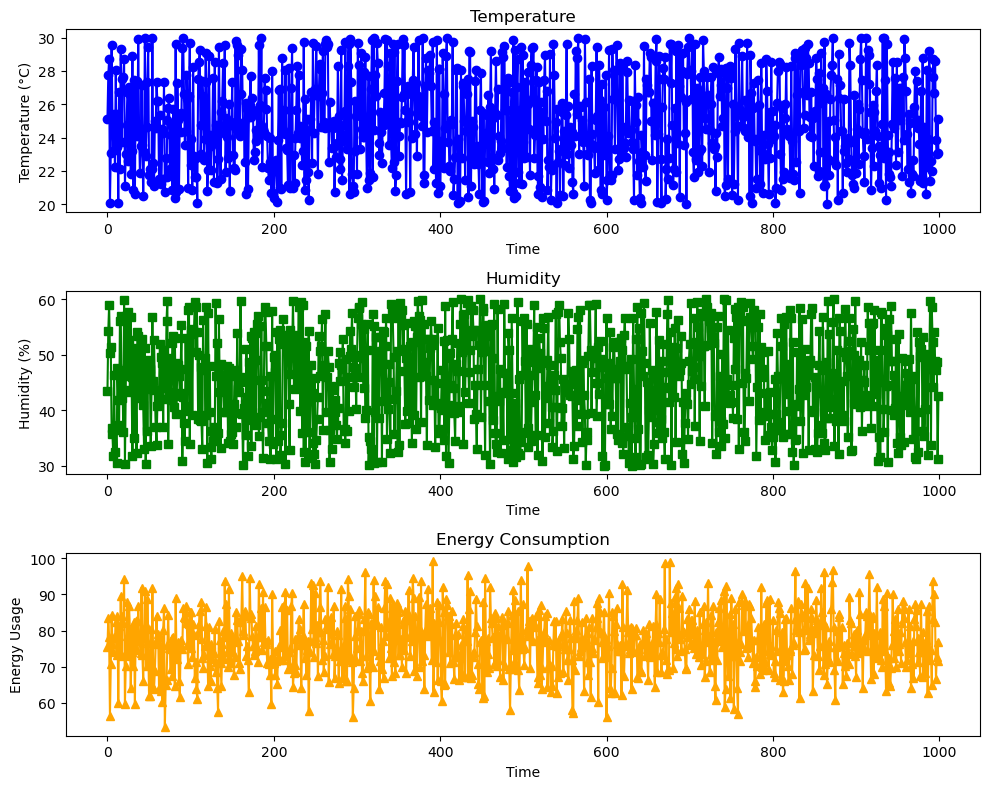

In [301]:

# creating visuals with columns 'Temperature', 'Humidity', and 'Energy_Consumption'

# Create subplots 
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Plot temperature
axs[0].plot(df['Temperature'], marker='o', color='blue')
axs[0].set_title('Temperature')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Temperature (°C)')

# Plot humidity
axs[1].plot(df['Humidity'], marker='s', color='green')
axs[1].set_title('Humidity')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Humidity (%)')

# Plot energy usage
axs[2].plot(df['Energy_Consumption'], marker='^', color='orange')
axs[2].set_title('Energy Consumption')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Energy Usage')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()



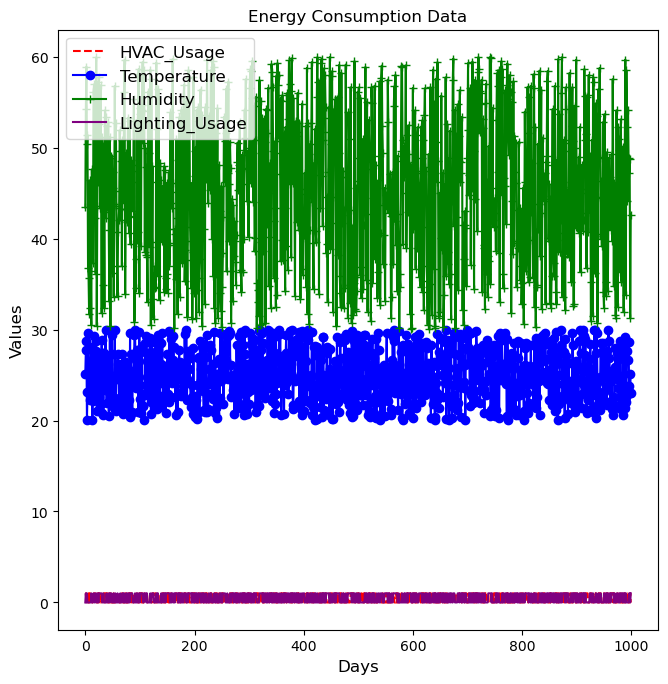

In [307]:
font =12
fig= plt.figure(figsize=(6,6))
axx=fig.add_axes([0,0,1,1])
axx.plot(df['HVAC_Usage'],'--r')
axx.plot(df['Temperature'],'-ob')
axx.plot(df['Humidity'], '-+g')
axx.plot(df['Lighting_Usage'], color ='purple')

axx.legend(['HVAC_Usage', 'Temperature', 'Humidity', 'Lighting_Usage'],fontsize = font)
axx.set_xlabel('Days', fontsize =font)
axx.set_ylabel('Values', fontsize =font)
axx.set_title('Energy Consumption Data', fontsize =font)
#to save
#fig.savefig('')
plt.show()



In [296]:
energy = df[['Temperature', 'Humidity', 'Energy_Consumption']]
energy.head(10)

Temperature   Humidity  Energy_Consumption
0    25.139433  43.431581           75.364373
1    27.731651  54.225919           83.401855
2    28.704277  58.907658           78.270888
3    20.080469  50.371637           56.519850
4    23.097359  51.401421           70.811732
5    29.576037  36.824263           84.321885
6    25.131167  35.709622           76.165791
7    23.182844  31.679920           74.131906
8    25.391999  46.399364           78.206236
9    22.212549  32.418464           77.992214

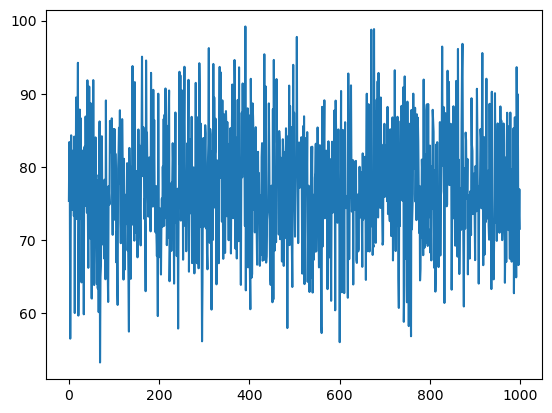

In [297]:
#plot a graph to check the energy consumption

plt.plot(energy["Energy_Consumption"])

***Observation:*** While temperature notably has an impact on energy consumption, the graph above illustrates that an increase in humidity leads to a decrease in temperature, consequently reducing both light and HVAC usage.

In [303]:
df['Renewable_Energy'].unique()

array([2.77469879e+00, 2.18313842e+01, 6.76467168e+00, 8.62344689e+00,
       3.07196922e+00, 1.76266898e+01, 2.42647023e+01, 2.75170993e+01,
       2.30759547e+00, 2.91400710e+01, 3.52238397e-01, 1.95295482e+01,
       2.17974436e+01, 6.38494915e+00, 1.20742231e+01, 1.09007700e+01,
       1.54539995e+01, 3.94067829e+00, 1.96889583e+01, 8.84808282e+00,
       1.17039777e+01, 1.45172037e+01, 4.30284459e+00, 6.60337546e-01,
       1.85810340e+01, 8.90694551e+00, 2.40513551e+01, 2.94340343e+00,
       2.55137746e+01, 1.82705282e+01, 2.44688362e+01, 2.18651004e+01,
       4.64573861e+00, 3.72201265e-01, 1.18133114e+00, 8.16614696e+00,
       2.10608143e+01, 2.58480542e+01, 1.64717233e+00, 2.02177327e+01,
       8.27063917e+00, 1.69970239e+01, 2.44609095e+01, 2.04890978e+01,
       1.56547922e+01, 1.61049603e+01, 1.33905389e+01, 2.16001547e+01,
       2.21750222e+01, 6.66287448e+00, 9.84612712e+00, 5.35201864e+00,
       1.35238667e+01, 1.22748204e+01, 4.93873794e+00, 5.77030443e-01,
      

<Axes: xlabel='Energy_Consumption', ylabel='Density'>

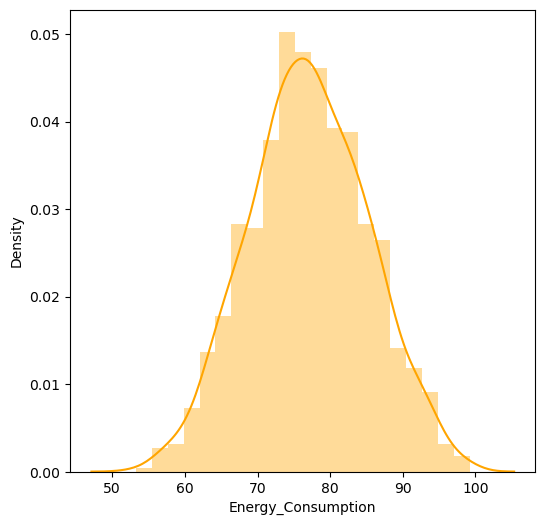

In [308]:
#creating a distplot to visualize the energy consumption 
plt.figure(figsize =(6,6))
sns.distplot(df['Energy_Consumption'], color ='orange')

***Observation:****    *It is seen that the energy consumption column data which serves as our target variable is positively and rightly skewed and the data is distributed at the center of the mean.*

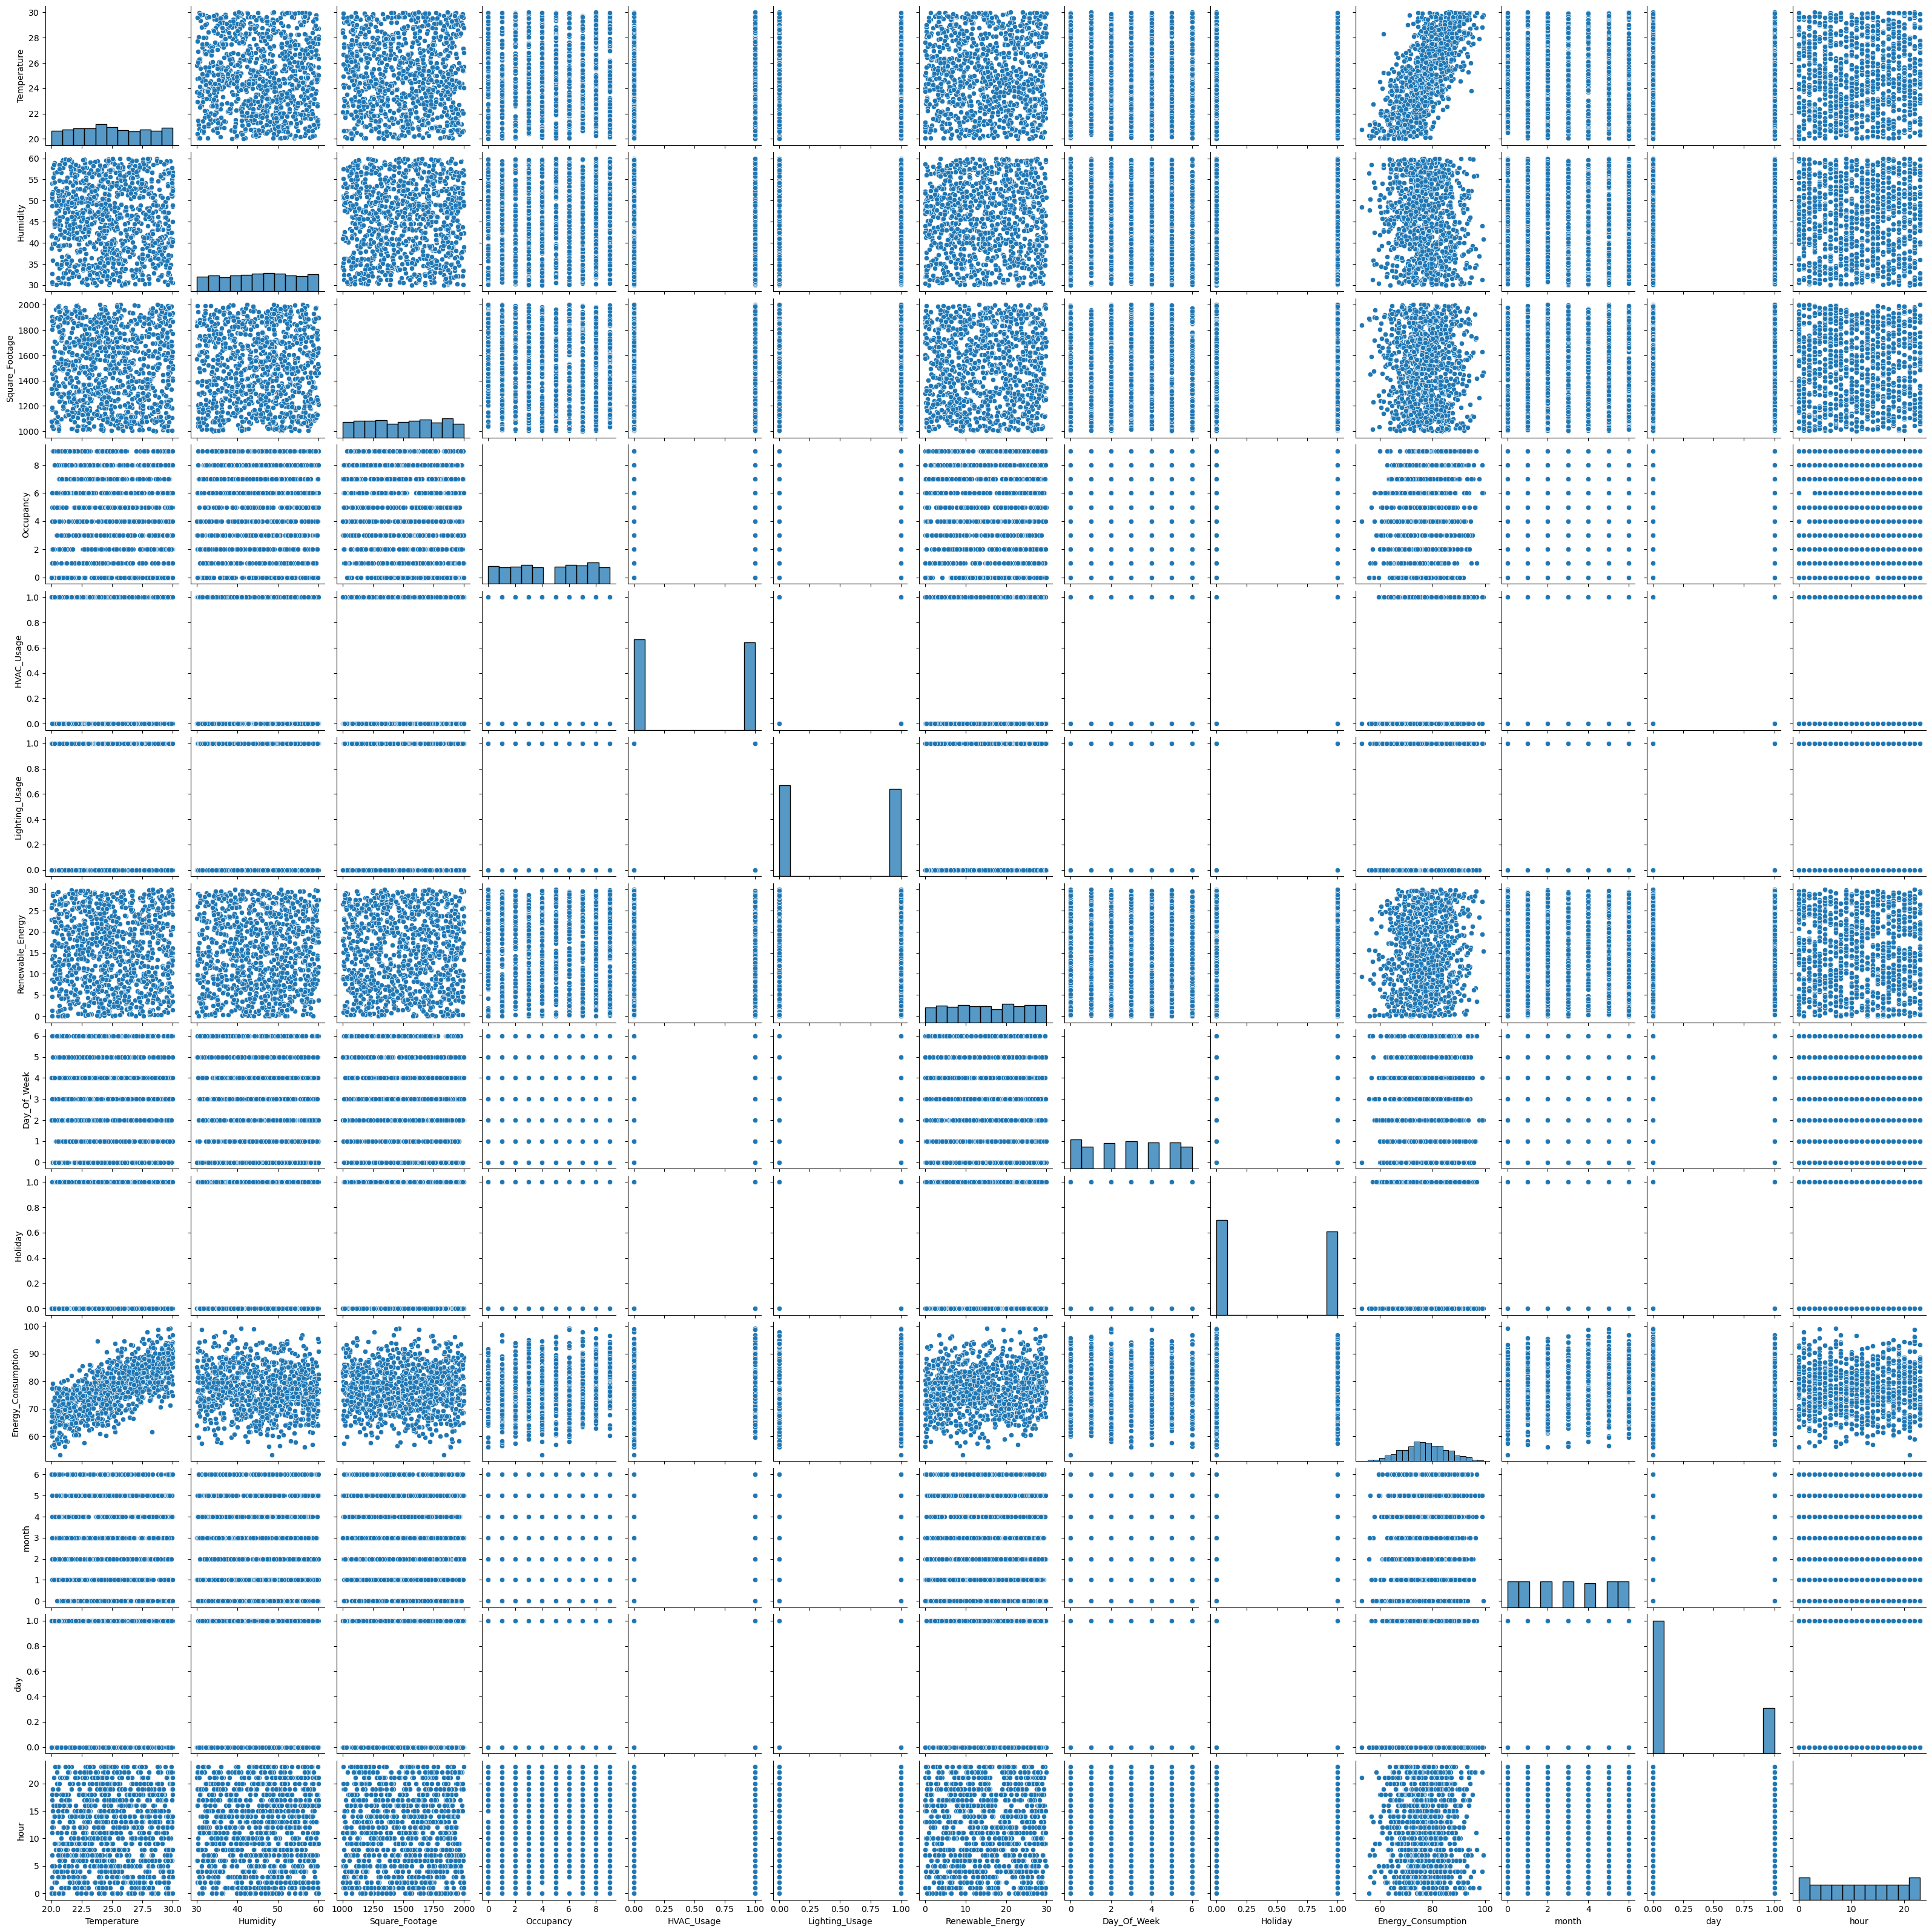

In [108]:
# the pairplot between the energy distrbution and other columns
sns.pairplot(df)
plt.show()


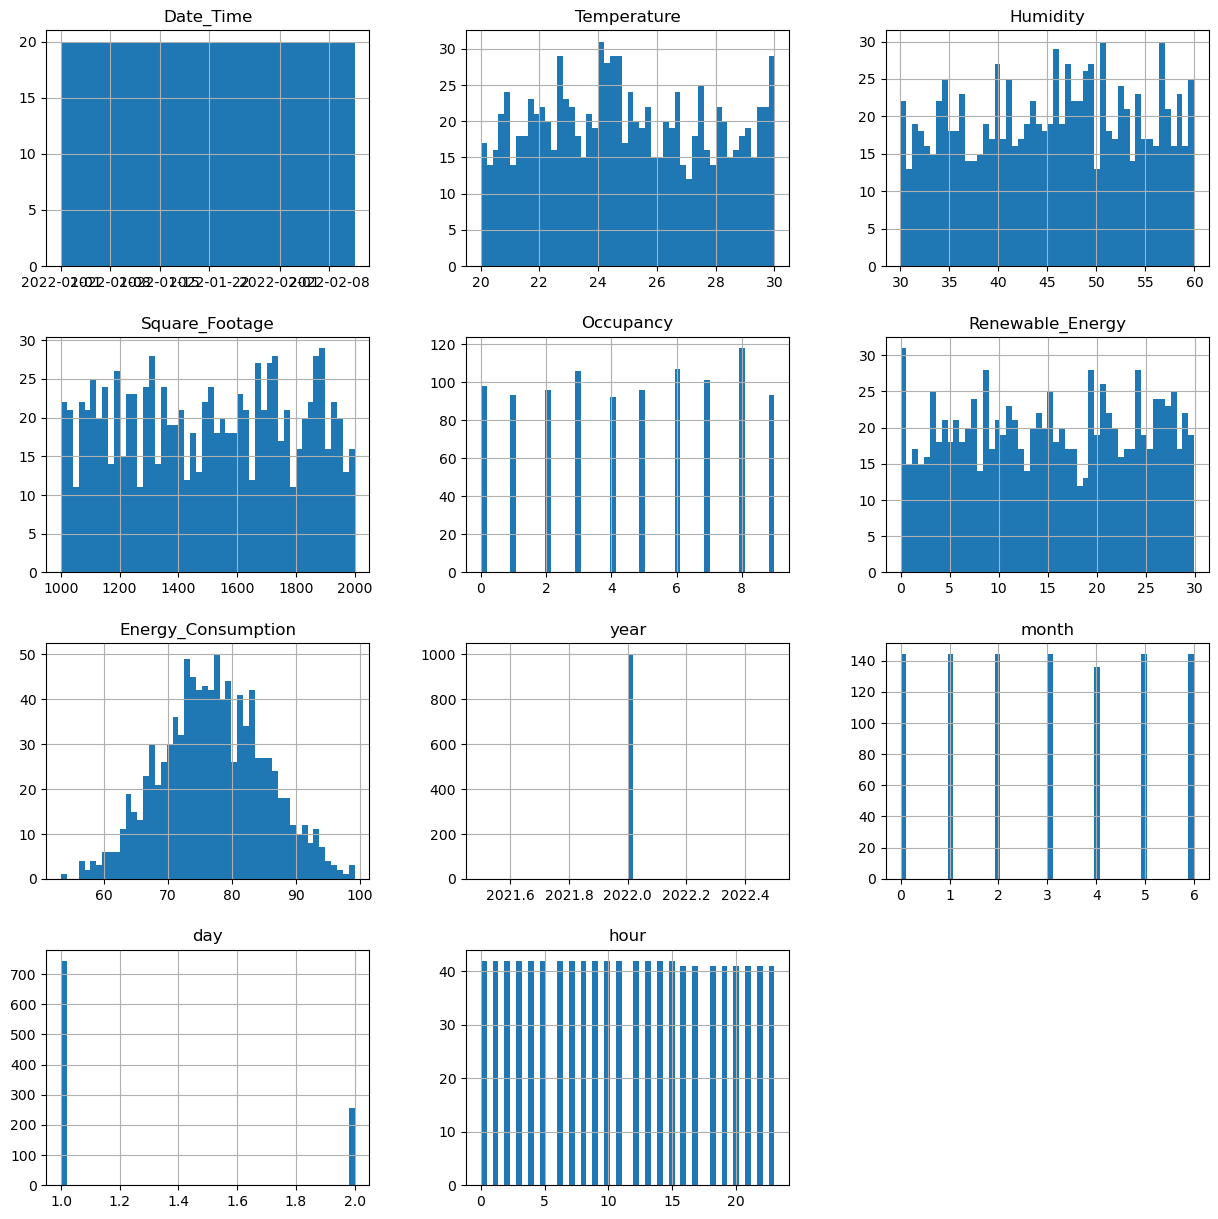

In [68]:
# histogram
df.hist(bins=50, figsize=(15, 15));


***Observation***   *The relationship between the dependent variable and the feature variables as seen in the gragh above the feature variables are following the normal distribution*

In [102]:
#dropping the year column
df.drop(columns=["year"], axis=1, inplace=True)


### **Data Modelling**


##### Using sklearn LabelEncoder

First,  we encode all the categorical features (both the target feature and the descriptive features) into a set of numerical features.

In [103]:
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.metrics import classification_report, confusion_matrix

In [104]:
for column in df:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])


In [105]:
#### *Creating a correlation*
# Exploring the correlation between the feature and target varibles

corr_value = df.corr()
corr_value

Temperature  Humidity  Square_Footage  Occupancy  \
Temperature            1.000000 -0.034032        0.004551  -0.003490   
Humidity              -0.034032  1.000000       -0.014651   0.004766   
Square_Footage         0.004551 -0.014651        1.000000   0.009696   
Occupancy             -0.003490  0.004766        0.009696   1.000000   
HVAC_Usage             0.001237 -0.094017        0.018244   0.012674   
Lighting_Usage         0.009446 -0.022207       -0.016915  -0.012062   
Renewable_Energy      -0.001350  0.002052        0.022196   0.013680   
Day_Of_Week           -0.018714 -0.061004        0.049412  -0.080218   
Holiday                0.026893 -0.033733       -0.027951   0.029863   
Energy_Consumption     0.696410 -0.093583       -0.001129   0.186580   
month                  0.028313 -0.028783       -0.039249  -0.037308   
day                   -0.002011 -0.003514        0.015341   0.008211   
hour                   0.028976 -0.008521       -0.005766   0.054860   

                    HVAC_Usage  Lighting_Usage  Renewable_Energy  Day_Of_Week  \
Temperature           0.001237        0.009446         -0.001350    -0.018714   
Humidity             -0.094017       -0.022207          0.002052    -0.061004   
Square_Footage        0.018244       -0.016915          0.022196     0.049412   
Occupancy             0.012674       -0.012062          0.013680    -0.080218   
HVAC_Usage            1.000000       -0.050303          0.016219     0.073383   
Lighting_Usage       -0.050303        1.000000         -0.029295    -0.008190   
Renewable_Energy      0.016219       -0.029295          1.000000    -0.050636   
Day_Of_Week           0.073383       -0.008190         -0.050636     1.000000   
Holiday               0.033020        0.042913         -0.035892     0.012257   
Energy_Consumption    0.286464        0.093423          0.081160    -0.002291   
month                 0.069737        0.055770          0.056701     0.017913   
day                  -0.027280       -0.007774          0.064936     0.044003   
hour                 -0.036914        0.029797          0.027207     0.000870   

                     Holiday  Energy_Consumption     month       day      hour  
Temperature         0.026893            0.696410  0.028313 -0.002011  0.028976  
Humidity           -0.033733           -0.093583 -0.028783 -0.003514 -0.008521  
Square_Footage     -0.027951           -0.001129 -0.039249  0.015341 -0.005766  
Occupancy           0.029863            0.186580 -0.037308  0.008211  0.054860  
HVAC_Usage          0.033020            0.286464  0.069737 -0.027280 -0.036914  
Lighting_Usage      0.042913            0.093423  0.055770 -0.007774  0.029797  
Renewable_Energy   -0.035892            0.081160  0.056701  0.064936  0.027207  
Day_Of_Week         0.012257           -0.002291  0.017913  0.044003  0.000870  
Holiday             1.000000            0.056676 -0.010256  0.034207  0.074375  
Energy_Consumption  0.056676            1.000000  0.060690  0.023197  0.007718  
month              -0.010256            0.060690  1.000000 -0.061628 -0.004654  
day                 0.034207            0.023197 -0.061628  1.000000 -0.015791  
hour                0.074375            0.007718 -0.004654 -0.015791  1.000000

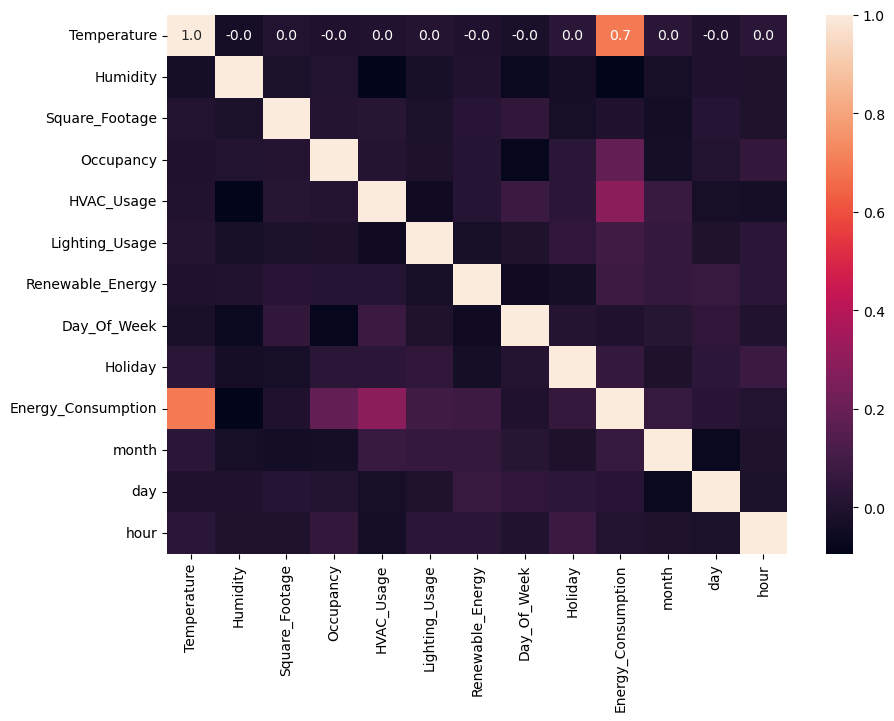

In [106]:
#heatmap
plt.figure(figsize =(10,7))
sns.heatmap(df.corr(), annot=True, fmt ='.1f');

In [101]:
df['year'].unique()

array([0], dtype=int64)

#### Perform feature scaling. 

Split the processed data into training and testing sets giving names of X_train, X_test, y_train, and y_test using an 80-20 split, 

setting a random state of 0 for reproducibility.


* Identify the features and target variable

In [131]:
#features and target variable
x = df.drop(['Energy_Consumption'], axis=1)
y= df['Energy_Consumption']

##### Data set Training and Spliting

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.2, random_state = 0)

In [133]:
print(x_train.shape)
print(x_test.shape)

(200, 12)
(800, 12)


##### Data Scaling

In [134]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

##### Linear Regression Model

In [135]:
#fit the algorithm
linear_reg=LinearRegression().fit(x_train_scaled, y_train)
print(linear_reg.score(x_train_scaled, y_train))

0.6465074907860942


In [136]:
#model prediction
y_pred = linear_reg.predict(x_test_scaled)

mse = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE: ", mse)


MSE:  4.186506155812995e+195


In [137]:
rmse = np.sqrt(mse)
print('RMSE: ', rmse)

RMSE:  6.4703215961905595e+97


In [138]:
r2 = r2_score(10**(y_test), 10**(y_pred))
print('R2: ', r2)

R2:  -0.0032153874562501628


In [139]:

print("MSE: ", mse)
print('RMSE: ', rmse)
print('R2: ', r2)
print('Adjusted R2:', 1-(1-r2_score(10**(y_test), 10**(y_pred))) *((x_test.shape[0]-1)/ (x_test.shape[0]- x_test.shape[1]-1)))



MSE:  4.186506155812995e+195
RMSE:  6.4703215961905595e+97
R2:  -0.0032153874562501628
Adjusted R2: -0.018512191331059524


In [148]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
lr_train =lr.predict(x_train_scaled)

#predicting the target value for the test set
y_pred2 = lr.predict(x_test_scaled)

mse_train = mean_squared_error(y_train, lr_train)
mse_test = mean_squared_error(y_test, y_pred2)

r2_train = r2_score(y_train, lr_train)
r2_test = r2_score(y_test, y_pred2)

print('******************************************************************')
print("Linear Regression Mean Square Error: ",mse_test)
print("Linear Regression R^2 Score: ", r2_test)

******************************************************************
Linear Regression Mean Square Error:  27.826535693028486
Linear Regression R^2 Score:  0.5842409848126248


##### RIDGE MODEL

In [213]:
rdg = Ridge()
rdg.fit(x_train_scaled, y_train)

# making a prediction of the value for the test data
rdg_train = rdg.predict(x_train_scaled)

# making a prediction of the value for the test data 
y_pred3= rdg.predict(x_test_scaled)

mse_rdg_train = mean_squared_error(y_train, rdg_train)
mse_rdg_test = mean_squared_error(y_test, y_pred3)

r2_rdg_train = r2_score(y_train, rdg_train)
r2_rdg_test = r2_score(y_test, y_pred3)


In [214]:
print('******************************************************************')
print("Ridge Mean Square Error: ",mse_rdg_test)
print("Ridge R^2 Score: ", r2_rdg_test)

******************************************************************
Ridge Mean Square Error:  27.855689228281513
Ridge R^2 Score:  0.5838053989660882


In [215]:
lasso = Lasso()
lasso.fit(x_train_scaled, y_train)

# making a prediction of the value for the test data
ls_train = lasso.predict(x_train_scaled)

# making a prediction of the value for the test data 
y_pred4= lasso.predict(x_test_scaled)

mse_ls_train = mean_squared_error(y_train, ls_train)
mse_ls_test = mean_squared_error(y_test, y_pred4)

r2_ls_train = r2_score(y_train, ls_train)
r2_ls_test = r2_score(y_test, y_pred4)


In [216]:
print('******************************************************************')
print("Lasso Mean Square Error: ",mse_ls_test)
print("Lasso R^2 Score: ", r2_ls_test)

******************************************************************
Lasso Mean Square Error:  46.874157971660225
Lasso R^2 Score:  0.29964858108738923


In [ ]:
here we are predicting the y- dependent variable using the independent variables
mse_lr = error between the train data and test data

the performance is very low in terms of ...

##### Decision Tree

In [204]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

#training the model
regressor = DecisionTreeRegressor(max_depth=6)
reg=regressor.fit(x_train_scaled, y_train)

In [205]:
# making a prediction of the value for the test data 
reg_train = regressor.predict(x_train_scaled)
y_pred5= regressor.predict(x_test_scaled)

mse_reg_train = mean_squared_error(y_train, reg_train)
mse_reg_test = mean_squared_error(y_test, y_pred5)

r2_reg_train = r2_score(y_train, reg_train)
r2_reg_test = r2_score(y_test, y_pred5)


In [302]:
print("The model performance on test data set")
print("--------------------------------------")
print('Decision Tree RMSE is {}'.format(rmse))
print('Decision Tree R sqaure score is {}'.format(r2))


The model performance on test data set
--------------------------------------
Decision Tree RMSE is 6.4703215961905595e+97
Decision Tree R sqaure score is -0.0032153874562501628


In [207]:
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))


-0.3108854841419837
-0.28104280116591474


In [208]:
#ploting the tree
from sklearn.tree import plot_tree
import numpy as np


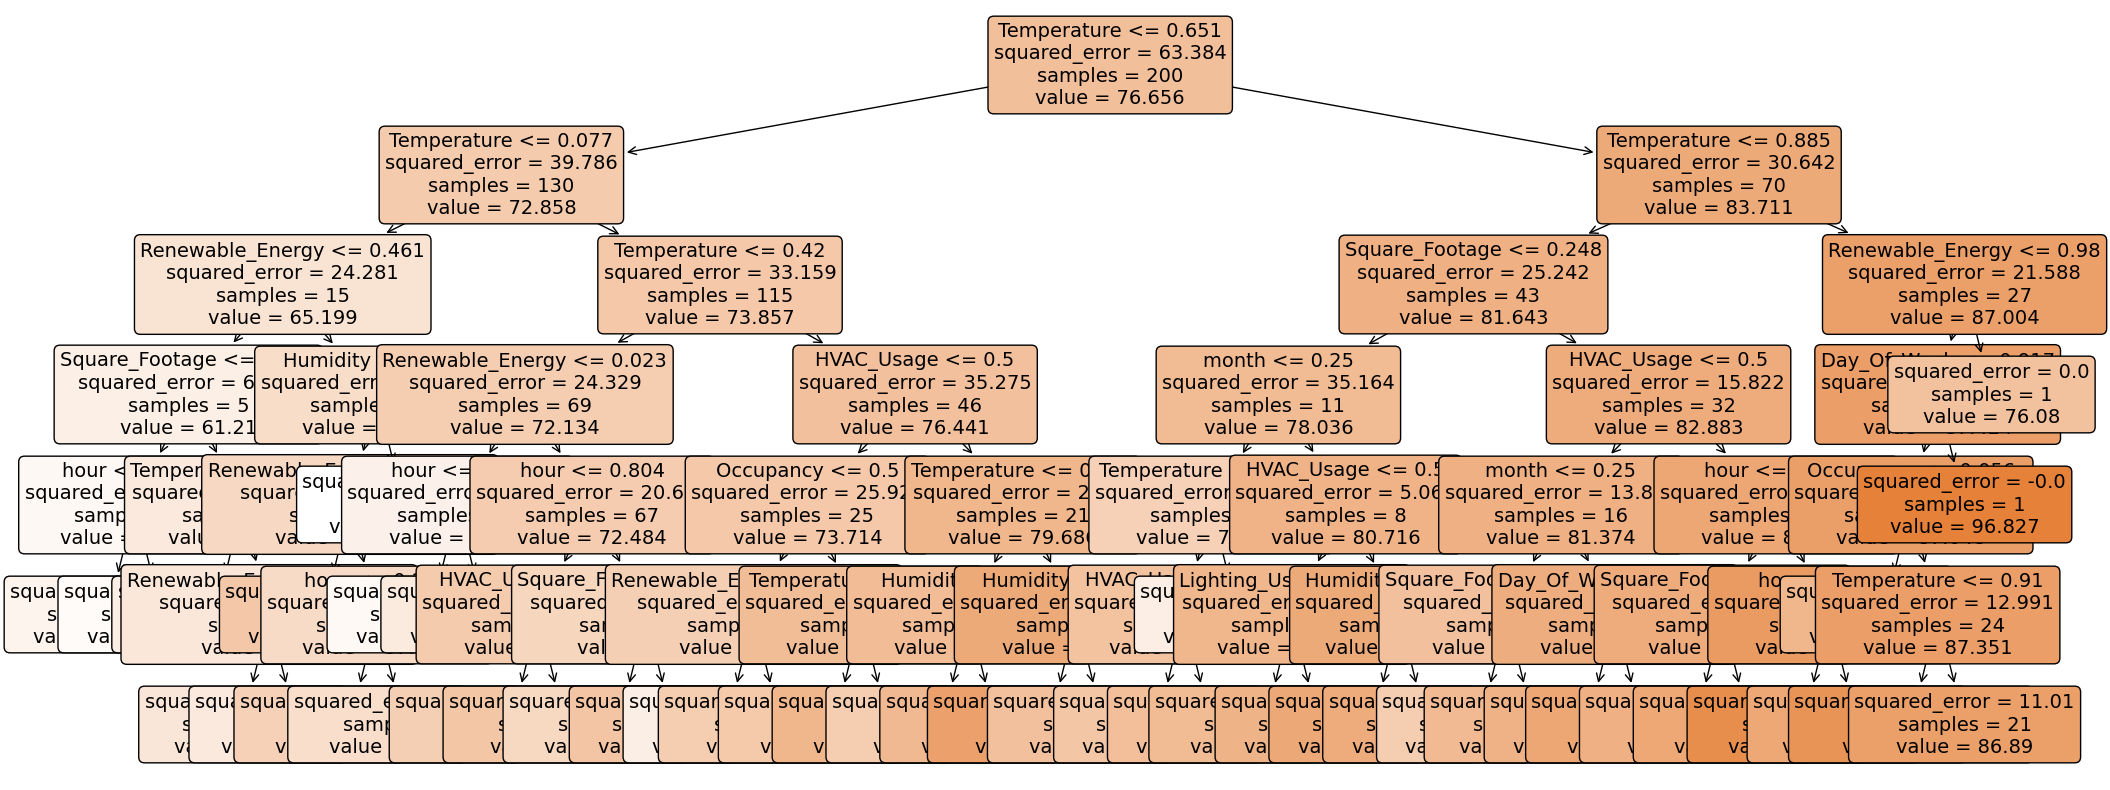

In [209]:
plt.figure(figsize=(25,10))
a = plot_tree(regressor, 
              feature_names=x.columns, 
              class_names=y, 
              filled=True, 
              rounded=True, 
              fontsize=14)

***Observation***

max-depth of 6 seems to give a better visual than other values that was used to check both the test score and the visualization strenght such as 3,4,5,7,8,9 

#### taking a look at the coeficient and the intercept of the other algorithms

In [233]:
print("Linear Regression Intercept:", lr.intercept_)
print("Ridge Intercept:", rdg.intercept_)
print("Lasso Intercept:", lasso.intercept_)

Linear Regression Intercept: 59.66042780852287
Ridge Intercept: 60.53271608608854
Lasso Intercept: 72.63547879431029


In [231]:
print("Linear Regression Coeficient:", lr.coef_)
print("Ridge Coeficient:", rdg.coef_)
print("Lasso Coeficient:", lasso.coef_)


Linear Regression Coeficient: [20.14503221 -0.33374735  1.05291933  4.45042837  3.84329803  1.26847421
  0.48339532  0.4460231  -0.49426378  2.95060941  0.87304198 -0.37451185]
Ridge Coeficient: [18.98053996 -0.34033712  0.98028132  4.21234444  3.76780503  1.23796387
  0.40037216  0.30639866 -0.45868672  2.85065047  0.85718664 -0.22962996]
Lasso Coeficient: [ 7.971966 -0.        0.        0.        0.        0.        0.
 -0.        0.        0.        0.        0.      ]


###### plot a graph of the actual and predicted performance of the energy consumption

<function matplotlib.pyplot.show(close=None, block=None)>

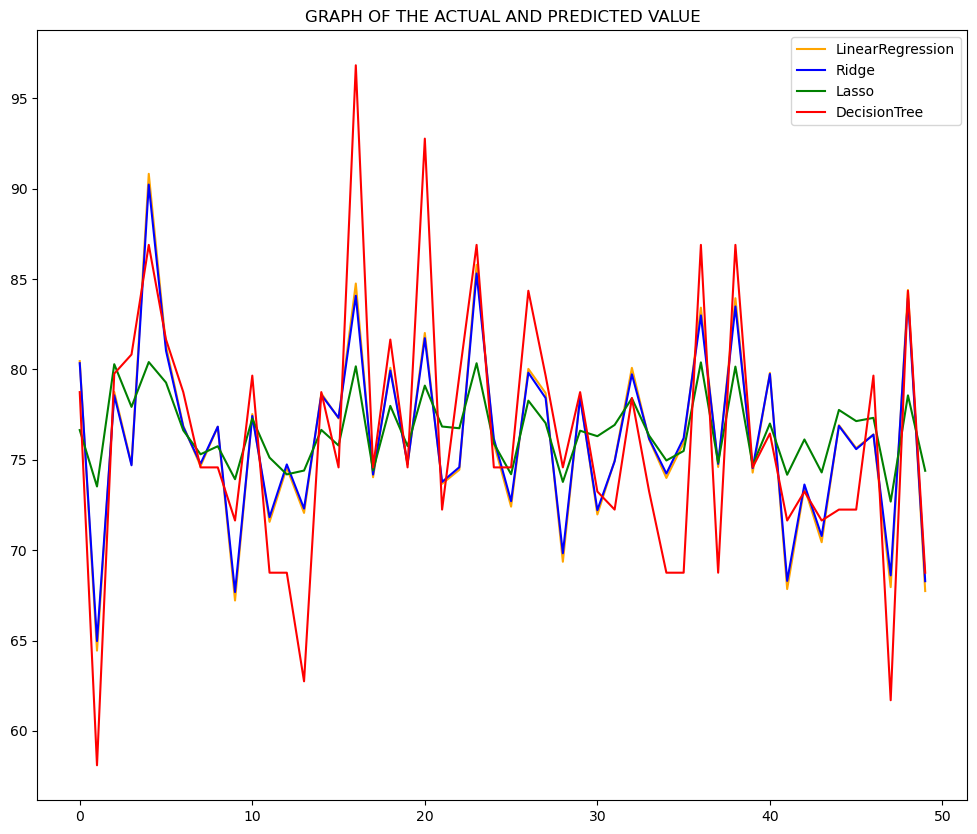

In [314]:
plt.figure(figsize=(12,10))
plt.plot(((y_pred2)[50:100]), color = "orange")
plt.plot(((y_pred3)[50:100]), color = "blue")
plt.plot(((y_pred4)[50:100]), color = "green")
plt.plot(((y_pred5)[50:100]), color = "red")

plt.legend(["LinearRegression", "Ridge", "Lasso", "DecisionTree"])
plt.title("GRAPH OF THE ACTUAL AND PREDICTED VALUE")

plt.show

In [237]:
#model prediction
linear_reg.predict([[23,1,3,45,34,5,65,5,4,3,2,1]])


array([905.00211689])

In [239]:
prediction = linear_reg.predict([[23,1,3,45,34,5,65,5,4,3,2,1]])
def consumption():
    if prediction==0:
        print('There is no energy consumption')
    else:
        print("Energy was consumed")
consumption()


Energy was consumed


comparison of the model performance of the actual value and predicted value 
Energy consumption of certain households.
orange represent the linear Regression
blue = Ridge
Green = Lasso
Red = Decision Tree

from the graph above, it was seen that decision tree is the best fit model,
followed by the LR and ridge.
But lasso is not the best fit model

### Performing a hyperparameter Tunning 
##### using Grid Search on the lasso and ridge regression models

In [245]:
ridge_hyper = {"alpha": [0.001, 0.01,0.1, 0.5, 1,2,5 ]}
lasso_hyper = {"alpha": [0.0001, 0.001,0.01, 0.2, 0.5, 1]}

In [246]:
ridge =Ridge()
lasso=Lasso()


In [248]:
#creating the grid search object
ridge_cv= GridSearchCV(ridge, param_grid= ridge_hyper, scoring= "neg_mean_squared_error")
lasso_cv =GridSearchCV(lasso, param_grid= lasso_hyper, scoring= "neg_mean_squared_error")

In [250]:
#fit the model
ridge_cv.fit(x_train_scaled, y_train)
lasso_cv.fit(x_train_scaled, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.2, 0.5, 1]},
             scoring='neg_mean_squared_error')

In [267]:
#fit the model with the best hyperparameters
rdg_b = Ridge(alpha=ridge_cv.best_params_['alpha']).fit(x_train_scaled, y_train)
ls_b = Lasso(alpha=lasso_cv.best_params_['alpha']).fit(x_train_scaled, y_train)

##### model prediction

In [259]:
# model prediction on the train data
y_train_rdg = rdg_b.predict(x_train_scaled)
y_train_ls = ls_b.predict(x_train_scaled)

# model prediction on the test data
y_pred_test_rdg = rdg_b.predict(x_test_scaled)
y_pred_test_ls = ls_b.predict(x_test_scaled)

In [261]:
# performing a model evaluation for ridge
mse_rdg_train = mean_squared_error(y_train, y_train_rdg)
mse_rdg_test =mean_squared_error(y_test, y_pred_test_rdg)

r2_rdg_train = r2_score(y_train, y_train_rdg)
r2_rdg_test =r2_score(y_test, y_pred_test_rdg)

# performing a model evaluation for lasso
mse_ls_train = mean_squared_error(y_train, y_train_ls)
mse_ls_test =mean_squared_error(y_test, y_pred_test_ls)

r2_rdg_train = r2_score(y_train, y_train_ls)
r2_rdg_test =r2_score(y_test, y_pred_test_ls)


In [278]:
print("The Best Alpha Ridge Regression:", ridge_cv.best_params_['alpha'])
print("The Ridge Mean Squared Error:", mse_rdg_test)
print("The Ridge R^2 Score:", r2_rdg_test )

#getting the % result for the ridge algorithm
mse_perc_rdg = mse_rdg_test * 100
r2_perc_rdg = r2_rdg_test * 100
print("The Percentage Ridge Mean Squared Error:{:2f}%".format(mse_perc_rdg) )
print("The Percentage Ridge R^2 (Squared):{:2f}%".format(r2_perc_rdg) )

print("----------------------------------------------------------------------------------")
print("")
#getting the result and % result for the lasso algorithm
print("The Best Alpha Lasso Regression:", lasso_cv.best_params_['alpha'])
print("The Lasso Mean Squared Error:", mse_ls_test)
print("The Lasso R^2 Score:", r2_ls_test )

#the percentage
mse_perc_ls = mse_rdg_test * 100
r2_perc_ls = r2_rdg_test * 100
print("The Percentage Lasso Mean Squared Error:{:2f}%".format(mse_perc_ls) )
print("The Percentage Lasso R^2 (Squared):{:2f}%".format(r2_perc_ls))

The Best Alpha Ridge Regression: 0.1
The Ridge Mean Squared Error: 27.81832435222262
The Ridge R^2 Score: 0.5837041085671201
The Percentage Ridge Mean Squared Error:2781.832435%
The Percentage Ridge R^2 (Squared):58.370411%
----------------------------------------------------------------------------------

The Best Alpha Lasso Regression: 0.2
The Lasso Mean Squared Error: 27.862468542257364
The Lasso R^2 Score: 0.29964858108738923
The Percentage Lasso Mean Squared Error:2781.832435%
The Percentage Lasso R^2 (Squared):58.370411%


***Comment:*** It was seen that before and after the hyperparameter tunning, the was no significant difference in the algorithms 

### ***Limitation/ Recommendation***

##### Limitation
Due to limited time, 
1. was not able to utilize and explore other models to determine the algorithm that will give me the best performance.
2. was not able to use other parameters for performing the hyperparameter tunning. was only limited to Grid search which gives a thorough search in the specific model and within the space provided but It takes time 
3. Was not able to deploy the work.

##### Recommendation:
- Government should set out a policy to see that renewable energy is utilized which will help to reduce the rate of energy consumption, save cost ensuring human and environmental benefits (by reducing carbon footprint) and enhancing human security.
- House owners should e	Ensure that th appliances that are not in use should be switched off to reduce energy consumptio.
- Planting trees in the environment and building houses in a high humidity environment should be encourgaed.n
y.


##### Future Work
1. We will deploy other models and and perform hyperparameter tuning to find the best model that fits in the data set to get the best result.
2. The work will be deployed to the internet using streamlit.

***Conclusion:***

We have introduced an emerging technology known as machine learning technology for the prediction of energy usage and consumption based on certain factors such as temperature and humidity. The machine learning linear regression models such as linear regression, ridge and, lasso as well as decision tree regression were deployed with the mean square error and root square metrics to comprehensively segment, analyze the data for a better performance and enhance accuracy in result prediction.

The results show that Linear Regression and Ridge Regression outperform Lasso Regression and Decision Tree Regression (Linear Regression and Ridge Regression are more informative) in predicting the energy consumption of an environment. 
The results are as follows; 

Linear Regression Mean Square Error:  27.826535693028486
Linear Regression R^2 Score:  0.5842409848126248

Ridge Mean Square Error:  27.855689228281513
Ridge R^2 Score:  0.5838053989660882

Lasso Mean Square Error:  46.874157971660225
Lasso R^2 Score:  0.29964858108738923

Decision Tree RMSE is 6.4703215961905595e+97
Decision Tree R sqaure score is -0.0032153874562501628

After the hyperparameter tuning, the 
performance of Lasso and Ridge regression models did not have any different from that of the simple Linear Regression model. 

However, we will explore different regression algorithms and perform hyperparameter tuning to find the best model that fits in the data set.


#### References

Daily Electricity Demand Forecast-Machine Learning. . 

Tooddd Moss atet al. ()2023. H""How does Energgyy Impact Econimomic Growth? an overview of the ecvidence.geie